In [1]:
#DATA ANALYSIS PORTFOLIO
#TOPIC- ANALYSING THE TOP RATED GOOGLEPLAY APPS
#DATA SOURCE: STATISTA
#LIBRARIES USED: PANDAS, NUMPY, MATPLOTLIB & SEABORN

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Importing the data from google sheets and checking the top 5 heads

sheet_id = '1lWgMrsoMyMh5Vq4OybUy2-32sYjoDQ62yTE4DUXL-Vg'
data_table = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv")
data_table.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#Getting the number of rows and columns
data_table.shape

(10841, 13)

In [5]:
#Summary Statistics
#Applying CLT to get certain values
data_table.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<AxesSubplot:>

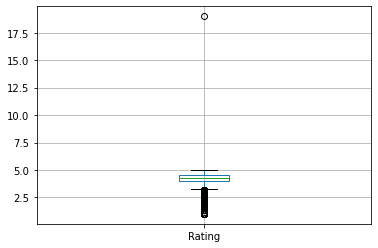

In [6]:
#Checking for outliers
data_table.boxplot()

In [7]:
#The concentration of values is between 3 to 5; There is one outlier (rating above 17.5)

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

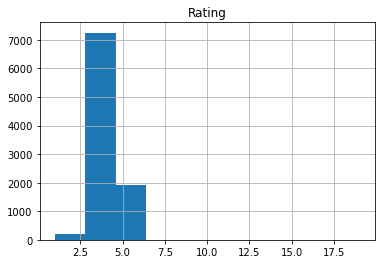

In [8]:
#Now checking for skewness
data_table.hist()

In [9]:
#The data is rightly skewed, so we will use median as the central tendency 
#

In [10]:
#Cleaning the Data
#Checking for null values
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


In [11]:
#Getting the boolean values for the null values
data_table.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#Counting these boolean values for getting a count of null values
data_table.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [13]:
#Removing outliers to stabalize variability
data_table[data_table.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
data_table.drop([10472],inplace=True)

In [15]:
#outlier is removed
data_table[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


<AxesSubplot:>

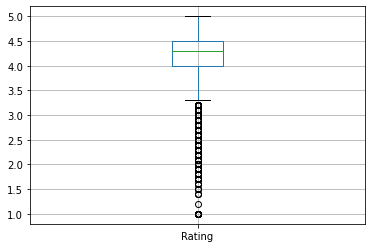

In [16]:
data_table.boxplot()

In [17]:
#All the values are concentrated between 4 to 4.5

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

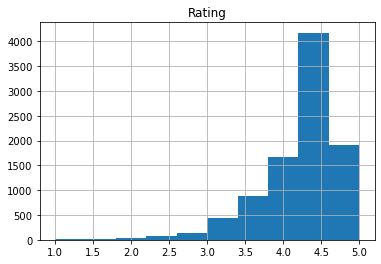

In [18]:
data_table.hist()

In [19]:
#Removing the columns that are 90% empty
thresh_empty = len(data_table)*0.1
thresh_empty

1084.0

In [20]:
data_table.dropna(thresh=thresh_empty,axis=1,inplace=True)

In [21]:
data_table.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [22]:
data_table.shape

(10840, 13)

In [23]:
#Filling the null values with suitable aggregate values
#Defining a function (impute_median) for imputation of median
def impute_median(series):
    return series.fillna(series.median())

In [24]:
data_table.Rating =  data_table['Rating'].transform(impute_median)

In [25]:
#Now, checking for null values again
data_table.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [26]:
#for categorical values
#using mode
#getting the mode values for the 3 categorical columns with null values
print(data_table['Type'].mode())
print(data_table['Current Ver'].mode())
print(data_table['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [27]:
#Replacing the missing values with mode
data_table['Type'].fillna(str(data_table['Type'].mode().values[0]),inplace=True)
data_table['Current Ver'].fillna(str(data_table['Current Ver'].mode().values[0]),inplace=True)
data_table['Android Ver'].fillna(str(data_table['Android Ver'].mode().values[0]),inplace=True)

In [28]:
#Checking for null values for one last time
data_table.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [29]:
#converting price and reviews into numerical values
data_table['Price'] = data_table['Price'].apply(lambda x: str(x).replace('$',' ') if '$' in str(x) else str(x))
data_table['Price'] = data_table['Price'].apply(lambda x: float(x))
data_table['Reviews'] = pd.to_numeric(data_table['Reviews'], errors = 'coerce')


In [33]:
data_table['Installs'] = data_table['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
data_table['Installs'] = data_table['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
data_table['Installs'] = data_table['Installs'].apply(lambda x: float(x))

In [36]:
data_table.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [37]:
data_table.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [41]:
#Plotting graphs
grp = data_table.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)

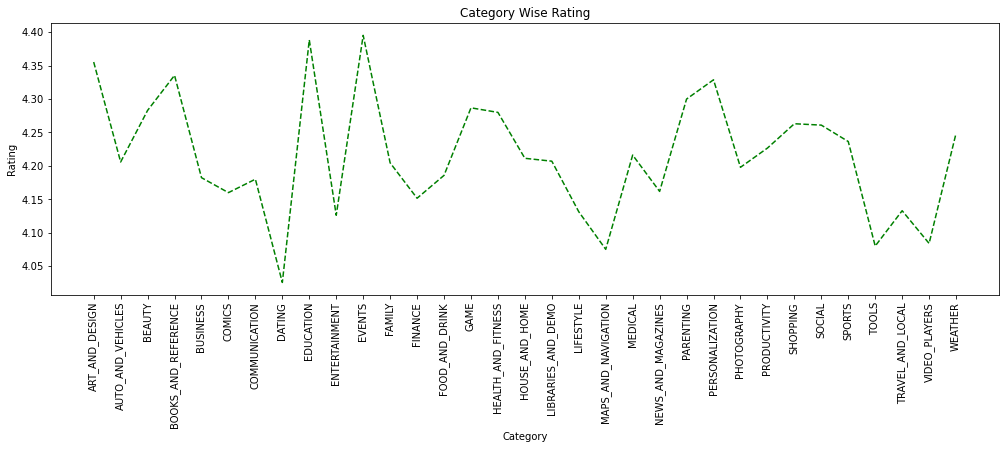

In [48]:
plt.figure(figsize=(17,5))
plt.plot(x,'r--',color='g')
plt.xticks(rotation=90)
plt.title('Category Wise Rating')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

In [ ]:
# The above graph shows that the average rating of educational and entertainment apps are the highest

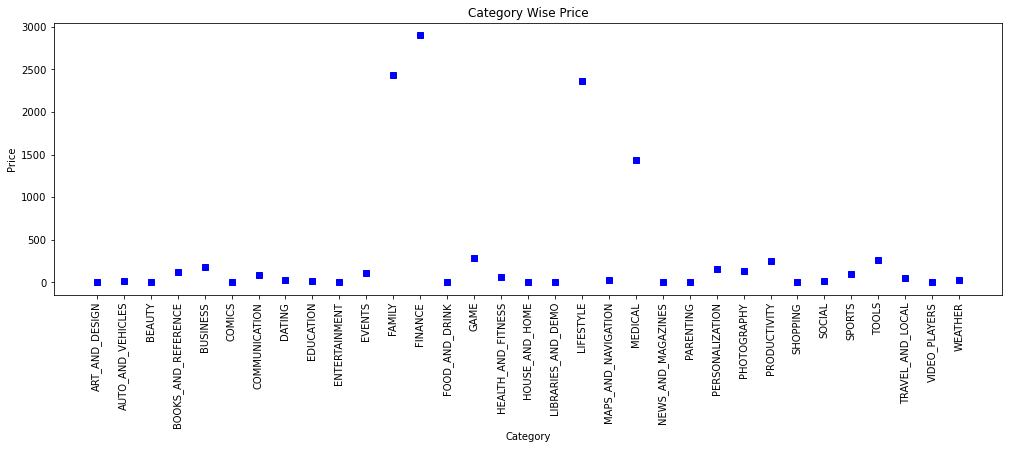

In [47]:
plt.figure(figsize=(17,5))
plt.plot(y,'bs',color='b')
plt.xticks(rotation=90)
plt.title('Category Wise Price')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

In [ ]:
# The above graph shows that the prices of finance apps are the highest

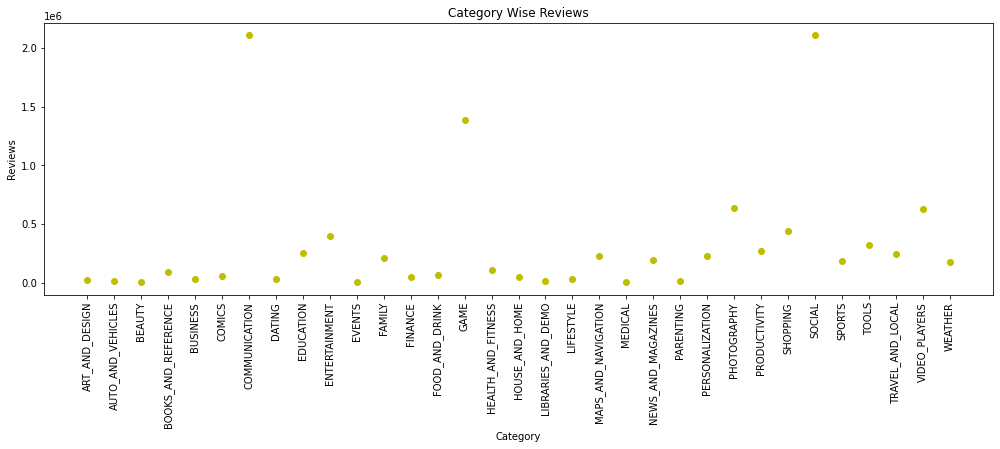

In [49]:
plt.figure(figsize=(17,5))
plt.plot(z,'ro',color='y')
plt.xticks(rotation=90)
plt.title('Category Wise Reviews')
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.show()

In [ ]:
# The above graph shows that the average reviews of communication and social apps are highest